# **LINEAR REGRESSION BLOCK START**

In [1]:
# Import dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def load_dataset():
    """ Reads dataset csv and returns pandas dataframe """
    
    filepath = "Hitters_Adjusted_Salary.csv"

    df = pd.read_csv(filepath, encoding="utf-8", low_memory=False)
    
    return df

In [4]:
def clean_dataset(a_df):
    """ Returns deduped, na-dropped, index-reset dataframe """    
    
    a_df = a_df.drop_duplicates()   
        
    a_df = a_df.dropna()
    
    a_df = a_df.drop(["Unnamed: 0", "playerID", "teamID", "lgID", "salary", "PO", "A", "E", "DP"], axis=1)
    
    totalhits = a_df["H"]
    doubles = a_df["2B"]
    triples = a_df["3B"]
    homeruns = a_df["HR"]
    atbats = a_df["AB"]
    walks = a_df["BB"]
    hit_by_pitch = a_df["HBP"]
    sac_hits = a_df["SH"]
    sac_flies = a_df["SF"]
    singles = (totalhits - homeruns - triples - doubles)
        
    a_df["slug_%"] = (singles + 2*doubles + 3*triples + 4*homeruns) / atbats
    a_df["slug_%"] = a_df["slug_%"].fillna(0)
    a_df["avg"] = totalhits / atbats
    a_df["avg"] = a_df["avg"].fillna(0)
    a_df["plate_appearances"] = atbats + walks + hit_by_pitch + sac_hits + sac_flies
    a_df["avg"] = a_df["avg"].fillna(0)
    a_df["on_base_%"] = (totalhits + walks + hit_by_pitch) / (atbats + walks + hit_by_pitch + sac_flies)
    a_df["on_base_%"] = a_df["on_base_%"].fillna(0)
    a_df["1B"] = singles
    a_df["1B"] = a_df["1B"].fillna(0)
    a_df["year_for_salary"] = a_df["yearID"] + 1 
    a_df = a_df.drop(["yearID"], axis=1)
     
    a_df = a_df.reset_index(drop=True)
    
    return a_df  

In [5]:
def rename_columns(a_df):
    """ Returns dataframe with meaningful column names """    
    
    abbr_dict = {"GS": "games_started", "InnOuts": "inning_outs", "G": "games_played", "AB": "at_bats",\
                "R": "runs", "H": "total_hits", "1B": "singles", "2B": "doubles", "3B": "triples", "HR": "home_runs",\
                "RBI": "runs_batted_in", "SB": "stolen_bases", "CS": "caught_stealing", "BB": "base_on_balls",\
                "SO": "strike_outs", "IBB": "intentional_walks", "HBP": "hit_by_pitch", "SH": "sacrifice_hits",\
                "SF": "sacrifice_flies", "GIDP": "ground_into_double_play"}
    
    a_df = a_df.rename(columns=abbr_dict)
    
    return a_df   

In [6]:
def examine_dataset(a_df):
    """ Provides summary info and visualizations of dataset """
    
    print(a_df.info())
          
    a_df.hist(figsize = (15, 15))  

In [7]:
def round_salaries(a_df):
    """ Returns dataframe with salary column made into int and rounded """

    a_df["ADJ Salary"] = a_df["ADJ Salary"].astype("int").round()

    return a_df

In [8]:
def run_regression(a_df, salary_col_name="ADJ Salary"):
    """ Runs linear regression on dataframe, prints model scores """

    # Assign X and y
    
    

    X = a_df.drop([salary_col_name], axis=1)
    y = a_df[salary_col_name]
    
    # Split the data into X_train, X_test, y_train, y_test

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Create a scaler to standardize the data

    scaler = StandardScaler()

    # Train the scaler with the X_train data.

    scaler.fit(X_train)

    # Transform X_train and X_test.

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LinearRegression().fit(X_train_scaled, y_train)
    
    predicted = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)
    
    print(f"MSE: {mse}")
    print(f"R2: {r2}") 
    
    # Score the model

    print(f"Linear Regression Training Data Score: {model.score(X_train_scaled, y_train)}")
    print(f"Linear Regression Testing Data Score: {model.score(X_test_scaled, y_test)}")  
    
    plt.bar(np.arange(len(model.coef_)), model.coef_)
    plt.title(f'Linear Regression coefficient plot')
    plt.show()  

In [9]:
def run_LASSO(a_df):
    """ Runs LASSO regression on dataframe, prints model scores """

    # Assign X and y

    X = a_df.drop(["log_of_salary"], axis=1)
    y = a_df["log_of_salary"]
    
    # Split the data into X_train, X_test, y_train, y_test

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Create a scaler to standardize the data

    scaler = StandardScaler()

    # Train the scaler with the X_train data.

    scaler.fit(X_train)

    # Transform X_train and X_test.

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    lasso_reg = Lasso().fit(X_train, y_train)

    predicted = lasso_reg.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)
    
    print(f"MSE: {mse}")
    print(f"R2: {r2}") 

    # Score the model

    print(f"LASSO Regression Training Data Score: {lasso_reg.score(X_train_scaled, y_train)}")
    print(f"LASSO Regression Testing Data Score: {lasso_reg.score(X_test_scaled, y_test)}")
    
    plt.bar(np.arange(len(lasso_reg.coef_)), lasso_reg.coef_)
    plt.title(f'LASSO Regression coefficient plot')
    plt.show()  
    
    sel = SelectFromModel(lasso_reg)
    sel.fit(X_train_scaled, y_train)
    SelectFromModel(estimator=Lasso())
    
    X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
    
    scaler = StandardScaler().fit(X_selected_train)
    
    X_selected_train_scaled = scaler.transform(X_selected_train)
    X_selected_test_scaled = scaler.transform(X_selected_test)

    new_lasso_reg = LinearRegression().fit(X_selected_train_scaled, y_train)
    print(f"New linear regression score: {new_lasso_reg.score(X_selected_test_scaled, y_test)}")

In [10]:
def run_Ridge(a_df):
    """ Runs Ridge regression on dataframe, prints model scores """

    # Assign X and y

    X = a_df.drop(["log_of_salary"], axis=1)
    y = a_df["log_of_salary"]
    
    # Split the data into X_train, X_test, y_train, y_test

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Create a scaler to standardize the data

    scaler = StandardScaler()

    # Train the scaler with the X_train data.

    scaler.fit(X_train)

    # Transform X_train and X_test.

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    ridge_reg = Ridge().fit(X_train, y_train)

    predicted = ridge_reg.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)
    
    print(f"MSE: {mse}")
    print(f"R2: {r2}") 

    # Score the model

    print(f"Ridge Regression Training Data Score: {ridge_reg.score(X_train_scaled, y_train)}")
    print(f"Ridge Regression Testing Data Score: {ridge_reg.score(X_test_scaled, y_test)}")

    plt.bar(np.arange(len(ridge_reg.coef_)), ridge_reg.coef_)
    plt.title(f'Ridge Regression coefficient plot')
    plt.show()     
    
    sel = SelectFromModel(ridge_reg)
    sel.fit(X_train_scaled, y_train)
    SelectFromModel(estimator=Ridge())
    
    X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
    
    scaler = StandardScaler().fit(X_selected_train)
    
    X_selected_train_scaled = scaler.transform(X_selected_train)
    X_selected_test_scaled = scaler.transform(X_selected_test)

    new_ridge_reg = LinearRegression().fit(X_selected_train_scaled, y_train)
    print(f"New linear regression score: {new_ridge_reg.score(X_selected_test_scaled, y_test)}")

In [11]:
def run_ElasticNet(a_df):
    """ Runs ElasticNet regression on dataframe, prints model scores """

    # Assign X and y

    X = a_df.drop(["log_of_salary"], axis=1)
    y = a_df["log_of_salary"]
    
    # Split the data into X_train, X_test, y_train, y_test

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Create a scaler to standardize the data

    scaler = StandardScaler()

    # Train the scaler with the X_train data.

    scaler.fit(X_train)

    # Transform X_train and X_test.

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    elasticnet_reg = ElasticNet().fit(X_train, y_train)
      
    predicted = elasticnet_reg.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)
    
    print(f"MSE: {mse}")
    print(f"R2: {r2}") 

    # Score the model

    print(f"ElasticNet Regression Training Data Score: {elasticnet_reg.score(X_train_scaled, y_train)}")
    print(f"ElasticNet Regression Testing Data Score: {elasticnet_reg.score(X_test_scaled, y_test)}")
    
    plt.bar(np.arange(len(elasticnet_reg.coef_)), elasticnet_reg.coef_)
    plt.title(f'ElasticNet Regression coefficient plot')
    plt.show()  
    
    sel = SelectFromModel(elasticnet_reg)
    sel.fit(X_train_scaled, y_train)
    SelectFromModel(estimator=ElasticNet())
    
    X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
    
    scaler = StandardScaler().fit(X_selected_train)
    
    X_selected_train_scaled = scaler.transform(X_selected_train)
    X_selected_test_scaled = scaler.transform(X_selected_test)

    new_elasticnet_reg = LinearRegression().fit(X_selected_train_scaled, y_train)
    print(f"New linear regression score: {new_elasticnet_reg.score(X_selected_test_scaled, y_test)}")

In [12]:
loaded_df = load_dataset()

In [13]:
loaded_df["ADJ Salary"] = loaded_df["ADJ Salary"].astype(int)

loaded_df = loaded_df.loc[~(loaded_df["ADJ Salary"] <= 0), :]

In [14]:
loaded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15022 entries, 0 to 15022
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15022 non-null  int64  
 1   yearID      15022 non-null  int64  
 2   playerID    15022 non-null  object 
 3   salary      15022 non-null  int64  
 4   ADJ Salary  15022 non-null  int32  
 5   GS          15022 non-null  float64
 6   InnOuts     15022 non-null  float64
 7   PO          15022 non-null  int64  
 8   A           15022 non-null  int64  
 9   E           15022 non-null  float64
 10  DP          15022 non-null  int64  
 11  teamID      15022 non-null  object 
 12  lgID        15022 non-null  object 
 13  G           15022 non-null  int64  
 14  AB          15022 non-null  int64  
 15  R           15022 non-null  int64  
 16  H           15022 non-null  int64  
 17  2B          15022 non-null  int64  
 18  3B          15022 non-null  int64  
 19  HR          15022 non-nul

In [ ]:
loaded_df.sample(100)

In [15]:
clean_df = clean_dataset(loaded_df)

In [16]:
clean_df = rename_columns(clean_df)

In [17]:
clean_df.head(10)

,ADJ Salary,games_started,inning_outs,games_played,at_bats,runs,total_hits,doubles,triples,home_runs,runs_batted_in,stolen_bases,caught_stealing,base_on_balls,strike_outs,intentional_walks,hit_by_pitch,sacrifice_hits,sacrifice_flies,ground_into_double_play,slug_%,avg,plate_appearances,on_base_%,singles,year_for_salary
0,1310892,67.0,1698.0,70,208,12,42,6,0,0,20.0,0.0,1.0,22,12.0,1.0,1.0,4.0,2.0,8.0,0.230769,0.201923,237.0,0.278970,36,1986
1,1503316,76.0,2097.0,96,282,15,61,9,0,3,25.0,0.0,3.0,29,25.0,1.0,1.0,0.0,4.0,15.0,0.280142,0.216312,316.0,0.287975,49,1986
2,1924245,27.0,814.0,101,170,16,40,7,0,3,21.0,0.0,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0,0.329412,0.235294,189.0,0.306878,30,1986
3,601326,124.0,3299.0,138,492,58,130,15,2,17,72.0,9.0,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0,0.406504,0.264228,542.0,0.327172,96,1986
4,3607960,125.0,3196.0,130,483,61,129,25,3,27,89.0,1.0,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0,0.498965,0.267081,540.0,0.333333,74,1986
5,1094414,130.0,3425.0,142,439,51,102,21,0,5,39.0,4.0,3.0,56,54.0,2.0,4.0,7.0,6.0,11.0,0.314351,0.232346,512.0,0.320792,76,1986
6,1864112,113.0,3009.0,130,444,52,123,25,2,8,61.0,6.0,7.0,37,57.0,8.0,0.0,1.0,6.0,9.0,0.396396,0.277027,488.0,0.328542,88,1986
7,3908623,161.0,4264.0,162,616,118,185,32,2,37,111.0,10.0,3.0,90,141.0,15.0,1.0,0.0,5.0,14.0,0.538961,0.300325,712.0,0.387640,114,1986
8,1483273,113.0,3041.0,134,412,30,112,19,4,3,35.0,1.0,2.0,51,38.0,6.0,6.0,1.0,2.0,10.0,0.359223,0.271845,472.0,0.358811,86,1986
9,288636,50.0,1325.0,110,238,22,51,5,0,3,13.0,9.0,5.0,23,28.0,1.0,0.0,0.0,1.0,7.0,0.273109,0.214286,262.0,0.282443,43,1986


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15022 entries, 0 to 15021
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ADJ Salary               15022 non-null  int32  
 1   games_started            15022 non-null  float64
 2   inning_outs              15022 non-null  float64
 3   games_played             15022 non-null  int64  
 4   at_bats                  15022 non-null  int64  
 5   runs                     15022 non-null  int64  
 6   total_hits               15022 non-null  int64  
 7   doubles                  15022 non-null  int64  
 8   triples                  15022 non-null  int64  
 9   home_runs                15022 non-null  int64  
 10  runs_batted_in           15022 non-null  float64
 11  stolen_bases             15022 non-null  float64
 12  caught_stealing          15022 non-null  float64
 13  base_on_balls            15022 non-null  int64  
 14  strike_outs           

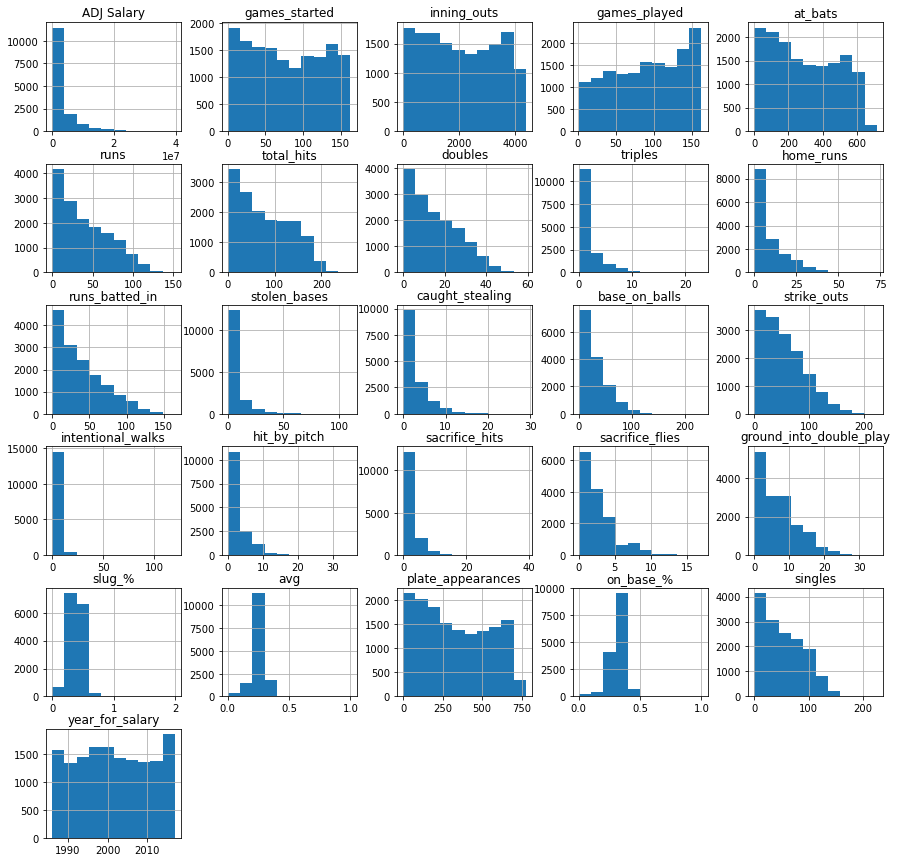

In [18]:
examine_dataset(clean_df)

In [19]:
clean_df = round_salaries(clean_df)

In [20]:
clean_df["log_of_salary"] = np.log(clean_df["ADJ Salary"])

In [21]:
clean_df["log_of_salary"].describe()

count    15022.000000
mean        14.050117
std          1.314890
min          9.879297
25%         13.033089
50%         13.842179
75%         15.131481
max         17.499634
Name: log_of_salary, dtype: float64

In [22]:
clean_df

,ADJ Salary,games_started,inning_outs,games_played,at_bats,runs,total_hits,doubles,triples,home_runs,runs_batted_in,stolen_bases,caught_stealing,base_on_balls,strike_outs,intentional_walks,hit_by_pitch,sacrifice_hits,sacrifice_flies,ground_into_double_play,slug_%,avg,plate_appearances,on_base_%,singles,year_for_salary,log_of_salary
0,1310892,67.0,1698.0,70,208,12,42,6,0,0,20.0,0.0,1.0,22,12.0,1.0,1.0,4.0,2.0,8.0,0.230769,0.201923,237.0,0.278970,36,1986,14.086218
1,1503316,76.0,2097.0,96,282,15,61,9,0,3,25.0,0.0,3.0,29,25.0,1.0,1.0,0.0,4.0,15.0,0.280142,0.216312,316.0,0.287975,49,1986,14.223184
2,1924245,27.0,814.0,101,170,16,40,7,0,3,21.0,0.0,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0,0.329412,0.235294,189.0,0.306878,30,1986,14.470044
3,601326,124.0,3299.0,138,492,58,130,15,2,17,72.0,9.0,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0,0.406504,0.264228,542.0,0.327172,96,1986,13.306892
4,3607960,125.0,3196.0,130,483,61,129,25,3,27,89.0,1.0,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0,0.498965,0.267081,540.0,0.333333,74,1986,15.098653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15017,6739673,80.0,2141.0,103,350,44,76,9,7,2,24.0,14.0,5.0,18,34.0,0.0,3.0,2.0,2.0,12.0,0.300000,0.217143,375.0,0.260054,58,2017,15.723522
15018,576808,39.0,1071.0,104,196,16,46,4,0,5,26.0,0.0,0.0,20,38.0,0.0,2.0,1.0,5.0,4.0,0.331633,0.234694,224.0,0.304933,37,2017,13.265265
15019,565054,48.0,1376.0,76,221,28,51,11,0,7,16.0,14.0,3.0,14,77.0,0.0,1.0,0.0,1.0,2.0,0.375566,0.230769,237.0,0.278481,33,2017,13.244677
15020,23436394,133.0,3474.0,143,525,84,128,28,0,21,69.0,5.0,1.0,71,139.0,0.0,4.0,0.0,6.0,17.0,0.417143,0.243810,606.0,0.334983,79,2017,16.969801


In [ ]:
run_regression(clean_df, "ADJ Salary")

In [ ]:
run_regression(clean_df, "log_of_salary")

In [ ]:
run_LASSO(clean_df)

In [ ]:
run_Ridge(clean_df)

In [ ]:
run_ElasticNet(clean_df)

# Results:

- Using the logarithm of the ADJ Salary column values improved the regression score
    - I had to eliminate any salary values <= 0 to make this work
- Ridge regression achieved the best score: 0.7291495360671353

# To Do:

- Add / remove features from the dataset?


# **LINEAR REGRESSION BLOCK END**

# **PCA START BLOCK**

# **PCA END BLOCK**
